# Single Path One-Shot Neural Architecture Search using Random Search

# Analysis notebook

### <span style="color:red">In this notebook, we will use accuracies and losses with tuned batch norms by default.</span>

## Setup

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

### Read saved data

In [2]:
with open('random_search_1000_models_tune_bn_supernet_advanced_360.json', 'r') as f:
    search_data = json.load(f)

In [3]:
accuracy = np.array(search_data['accuracy'])
loss = np.array(search_data['loss'])
tune_accuracy = np.array(search_data['tuned_accuracy'])
tune_loss = np.array(search_data['tuned_loss'])
macs = np.array(search_data['macs'])
params = np.array(search_data['params'])
architectures = search_data['arch']

### Define MAC limit as per task constraints

In [4]:
target_latency = 30 * 1e6

suitable_arch_indices = (macs <= target_latency)

### Show all evaluations

In [5]:
for i in np.argsort(tune_accuracy)[::-1]:
    print(f'{tune_accuracy[i]:.2%} {macs[i]:.2f} {architectures[i]}')

86.09% 38119936.00 [4, 5, 5, 4, 4, 0, 1, 2]
86.07% 39590400.00 [4, 5, 5, 0, 4, 2, 4, 3]
85.97% 44018176.00 [4, 5, 5, 1, 3, 5, 2, 5]
85.92% 35454464.00 [4, 4, 4, 0, 3, 4, 0, 3]
85.92% 40184832.00 [4, 5, 4, 5, 2, 2, 1, 3]
85.92% 48146944.00 [3, 4, 4, 5, 4, 5, 4, 5]
85.92% 40769024.00 [4, 5, 4, 0, 2, 5, 3, 4]
85.91% 40182784.00 [4, 4, 5, 3, 4, 5, 2, 0]
85.88% 35758080.00 [4, 5, 5, 4, 1, 1, 0, 2]
85.88% 38117888.00 [4, 5, 4, 2, 5, 4, 1, 0]
85.85% 35161600.00 [4, 4, 5, 1, 3, 2, 0, 3]
85.84% 37522944.00 [3, 5, 5, 1, 5, 1, 2, 3]
85.82% 44604928.00 [4, 4, 5, 1, 3, 5, 4, 5]
85.81% 36636160.00 [3, 4, 4, 3, 4, 3, 3, 0]
85.79% 34575360.00 [4, 4, 4, 5, 2, 2, 0, 0]
85.79% 43429888.00 [4, 5, 4, 4, 2, 4, 2, 4]
85.79% 32205824.00 [4, 3, 5, 1, 1, 1, 0, 4]
85.77% 35749888.00 [3, 5, 4, 1, 3, 1, 3, 3]
85.77% 37231616.00 [4, 5, 5, 3, 1, 0, 3, 3]
85.76% 37818880.00 [3, 4, 5, 5, 2, 2, 0, 3]
85.76% 37228544.00 [2, 5, 4, 5, 5, 1, 0, 2]
85.75% 49331200.00 [4, 4, 5, 5, 2, 5, 5, 5]
85.75% 40475648.00 [3, 5, 3, 5, 

### Show value distributions

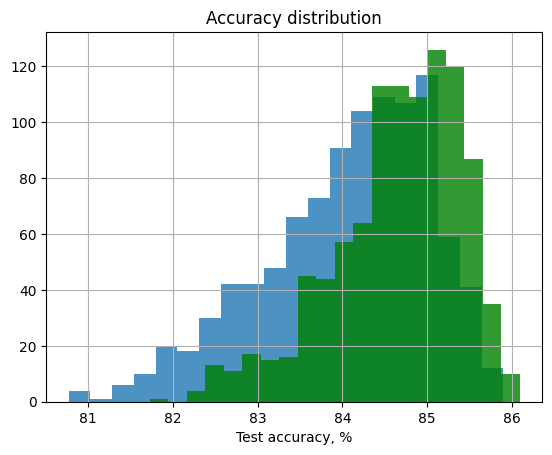

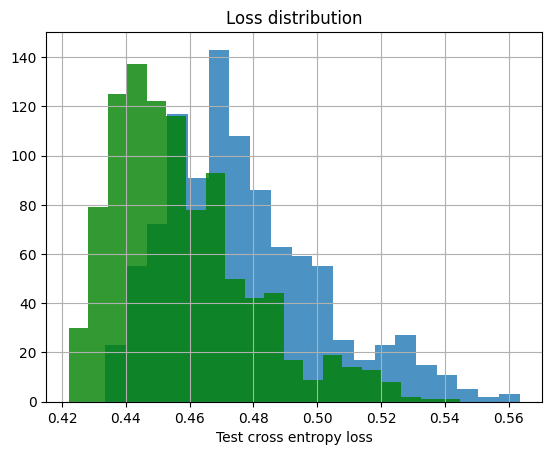

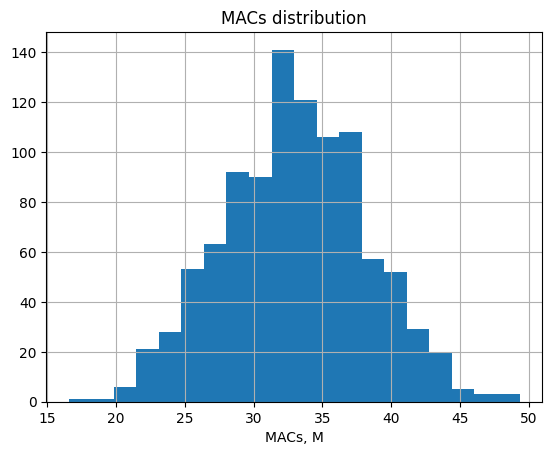

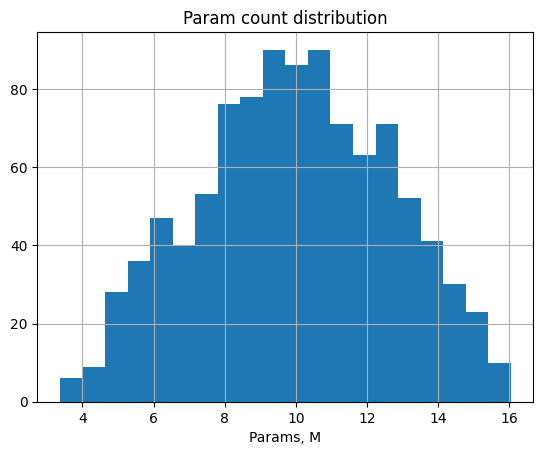

In [6]:
plt.title('Accuracy distribution')
plt.hist(accuracy * 100, bins=20, alpha=0.8)
plt.hist(tune_accuracy * 100, bins=20, color='g', alpha=0.8)
plt.xlabel('Test accuracy, %')
plt.grid()
plt.show()

plt.title('Loss distribution')
plt.hist(loss, bins=20, alpha=0.8)
plt.hist(tune_loss, bins=20, color='g', alpha=0.8)
plt.xlabel('Test cross entropy loss')
plt.grid()
plt.show()

plt.title('MACs distribution')
plt.hist(macs / 1e6, bins=20)
plt.xlabel('MACs, M')
plt.grid()
plt.show()

plt.title('Param count distribution')
plt.hist(params / 1e6, bins=20)
plt.xlabel('Params, M')
plt.grid()
plt.show()

### Find the best architecture

In [7]:
# Keep accuracy if arch satisfies MACs contraint and use 0 otherwise.
old_best_arch_index = (suitable_arch_indices * accuracy).argmax()
new_best_arch_index = (suitable_arch_indices * tune_accuracy).argmax()

old_best_arch = architectures[old_best_arch_index]
new_best_arch = architectures[new_best_arch_index]

print(f'Old best architecture: {old_best_arch}')
print(
    f'MACs={(macs[old_best_arch_index] / 1e6):.2f}M, '
    f'params={params[old_best_arch_index] / 1e6:.2f}M, '
    f'accuracy={tune_accuracy[old_best_arch_index]:.2%}, '
    f'loss={tune_loss[old_best_arch_index]:.4f}'
)
print()

print(f'New best architecture: {new_best_arch}')
print(
    f'MACs={(macs[new_best_arch_index] / 1e6):.2f}M, '
    f'params={params[new_best_arch_index] / 1e6:.2f}M, '
    f'accuracy={tune_accuracy[new_best_arch_index]:.2%}, '
    f'loss={tune_loss[new_best_arch_index]:.4f}'
)
print()

print(f'Mean MACs: {macs.mean() / 1e6:.2f}M')
print(f'Mean test accuracy (before tuning): {accuracy.mean():.2%}')
print(f'Mean test accuracy (after tuning): {tune_accuracy.mean():.2%}')

Old best architecture: [4, 1, 4, 5, 1, 0, 1, 0]
MACs=28.66M, params=4.73M, accuracy=85.31%, loss=0.4437

New best architecture: [3, 5, 1, 0, 2, 0, 4, 1]
MACs=28.37M, params=8.31M, accuracy=85.65%, loss=0.4341

Mean MACs: 33.02M
Mean test accuracy (before tuning): 84.06%
Mean test accuracy (after tuning): 84.64%


### Final analysis

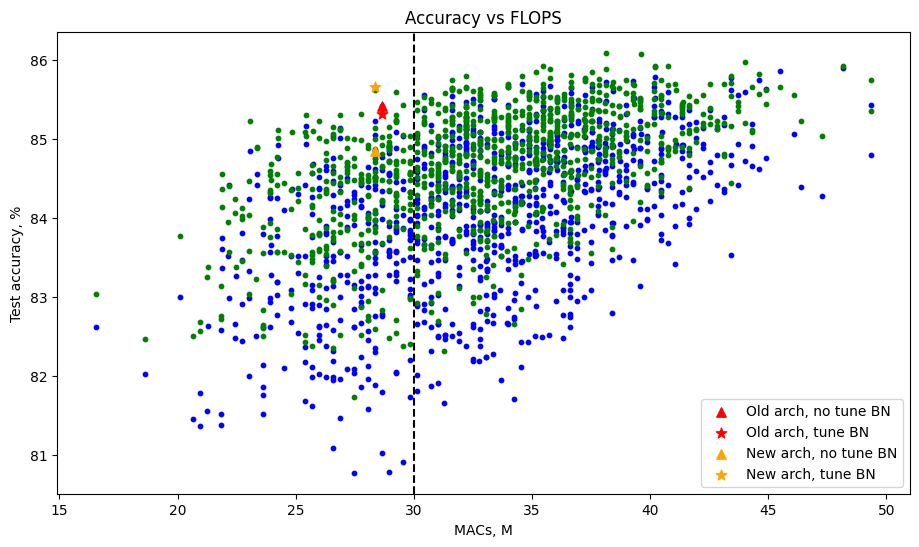

Total number of architectures satisfying latency contraint: 282 (28.2%)


In [8]:
plt.figure(figsize=(11, 6))
plt.title('Accuracy vs FLOPS')
plt.axvline(target_latency / 1e6, c='k', linestyle='--')

plt.scatter(macs / 1e6, accuracy * 100, c='b', s=10)
plt.scatter(macs / 1e6, tune_accuracy * 100, c='g', s=10)

old_best_macs = macs[old_best_arch_index] / 1e6
old_best_accuracy = accuracy[old_best_arch_index] * 100
old_best_tune_accuracy = tune_accuracy[old_best_arch_index] * 100

plt.scatter(old_best_macs, old_best_accuracy, label="Old arch, no tune BN", s=45, c='r', marker='^')
plt.scatter(old_best_macs, old_best_tune_accuracy, label="Old arch, tune BN", s=60, c='r', marker='*')

new_best_macs = macs[new_best_arch_index] / 1e6
new_best_accuracy = accuracy[new_best_arch_index] * 100
new_best_tune_accuracy = tune_accuracy[new_best_arch_index] * 100

plt.scatter(new_best_macs, new_best_accuracy, label="New arch, no tune BN", s=45, c='orange', marker='^')
plt.scatter(new_best_macs, new_best_tune_accuracy, label="New arch, tune BN", s=60, c='orange', marker='*')

plt.xlabel('MACs, M')
plt.ylabel('Test accuracy, %')
plt.legend()
plt.show()

print(
    f'Total number of architectures satisfying latency contraint: {suitable_arch_indices.sum()} '
    f'({suitable_arch_indices.sum() / len(macs):.1%})'
)

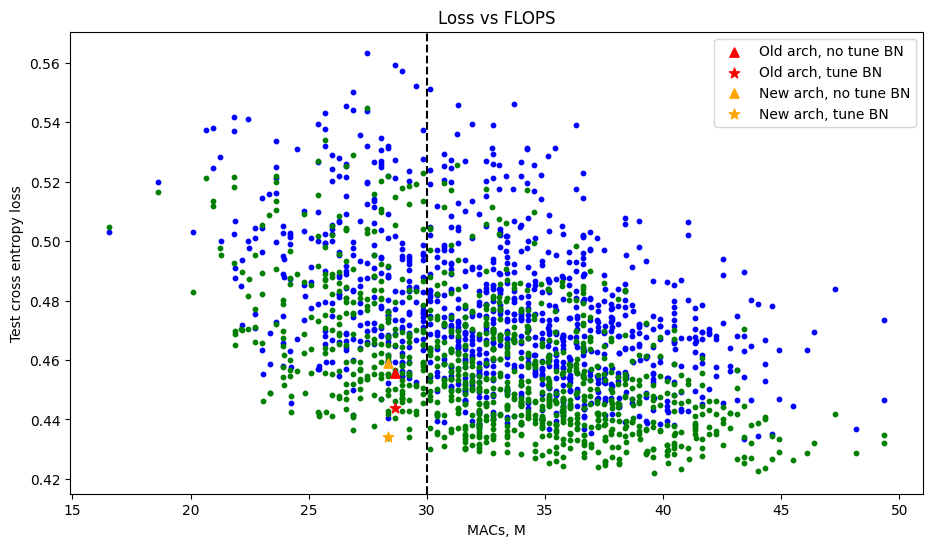

In [9]:
plt.figure(figsize=(11, 6))
plt.title('Loss vs FLOPS')
plt.axvline(target_latency / 1e6, c='k', linestyle='--')

plt.scatter(macs / 1e6, loss, c='b', s=10)
plt.scatter(macs / 1e6, tune_loss, c='g', s=10)

old_best_macs = macs[old_best_arch_index] / 1e6
old_best_loss = loss[old_best_arch_index]
old_best_tune_loss = tune_loss[old_best_arch_index]

plt.scatter(old_best_macs, old_best_loss, label="Old arch, no tune BN", s=45, c='r', marker='^')
plt.scatter(old_best_macs, old_best_tune_loss, label="Old arch, tune BN", s=60, c='r', marker='*')

new_best_macs = macs[new_best_arch_index] / 1e6
new_best_loss = loss[new_best_arch_index]
new_best_tune_loss = tune_loss[new_best_arch_index]

plt.scatter(new_best_macs, new_best_loss, label="New arch, no tune BN", s=45, c='orange', marker='^')
plt.scatter(new_best_macs, new_best_tune_loss, label="New arch, tune BN", s=60, c='orange', marker='*')

plt.xlabel('MACs, M')
plt.ylabel('Test cross entropy loss')
plt.legend()
plt.show()

## Observations from the analysis

1. Accuracies and losses improved after applying batch norm tuning.
2. We now have a different best architecture, which is [3, 5, 1, 0, 2, 0, 4, 1] with 28.4M MACs and 85.7% test accuracy.
3. We can see that it was underperforming due to incorrect batch norm statistics.

## Let's see how the new arch would perform in notebook 12.